In [1]:
# Trabajo final de Python
import pandas as pd
import numpy as np
import datetime 
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


In [2]:
diamonds = sm.datasets.get_rdataset('diamonds', 'ggplot2')
diamonds = diamonds.data

In [3]:
diamonds.head(10)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
5,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
6,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
7,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53
8,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49
9,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39


In [4]:
# Describe para ver valores max, min, etc del dataframe
diamonds.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [5]:
# obtener la media de carat
CaratMean = diamonds['carat'].mean()
print 'Carat Media ...> ', CaratMean

Carat Media ...>  0.797939747868


In [6]:
# obtener maximo de carat
CaratMax = diamonds['carat'].max()
print 'Carat Maximo ...> ', CaratMax

Carat Maximo ...>  5.01


In [7]:
# obtener mini o de carat
CaratMin = diamonds['carat'].min()
print 'Carat Minimo ...> ', CaratMin

Carat Minimo ...>  0.2


In [8]:
# Obtener los valores minimo, maximo y el promedio cuando se agrupo por carat
data = diamonds.groupby('carat')
data.agg([np.max, np.min, np.mean]).head(10)


depth                  table                  price                   \
       amax  amin       mean  amax  amin       mean  amax amin        mean   
carat                                                                        
0.20   63.4  59.0  61.100000  62.0  55.0  59.333333   367  345  365.166667   
0.21   63.2  58.3  60.511111  62.0  54.0  58.444444   394  326  380.222222   
0.22   65.1  59.3  61.620000  62.0  58.0  60.400000   470  337  391.400000   
0.23   64.8  56.2  61.426621  66.0  52.0  58.034130   688  326  486.143345   
0.24   65.1  57.2  61.599213  65.0  53.0  57.488189   963  336  505.185039   
0.25   65.6  54.4  61.565566  65.0  53.0  57.363208  1186  357  550.924528   
0.26   65.2  57.9  61.677470  63.0  53.0  56.911858   814  337  550.897233   
0.27   66.4  57.5  61.599142  64.0  53.0  56.778970   893  361  574.759657   
0.28   64.9  56.0  61.526263  64.0  52.0  56.863636   828  360  580.121212   
0.29   64.7  55.8  61.393077  65.0  44.0  56.846154  1776  334  601.192308   

          x                     y                     z                  
       amax  amin      mean  amax  amin      mean  amax  amin      mean  
carat                                                                    
0.20   3.86  3.73  3.786667  3.84  3.68  3.753333  2.36  2.24  2.303333  
0.21   3.96  3.82  3.874444  3.93  3.78  3.837778  2.40  2.29  2.332222  
0.22   3.93  3.87  3.898000  3.89  3.78  3.848000  2.49  2.31  2.386000  
0.23   4.14  3.83  3.946382  4.19  3.84  3.973379  2.50  2.31  2.431468  
0.24   4.12  3.85  3.990157  4.15  3.88  4.019331  2.54  2.36  2.465591  
0.25   5.33  3.91  4.062500  5.28  3.95  4.086934  3.12  2.32  2.506934  
0.26   4.24  3.99  4.102688  4.28  4.02  4.124704  2.62  2.45  2.536364  
0.27   4.30  3.99  4.159142  4.36  4.02  4.181588  2.66  2.45  2.567897  
0.28   4.38  4.09  4.207172  4.41  4.12  4.233687  2.69  2.46  2.595707  
0.29   4.48  4.14  4.262846  4.42  4.11  4.290538  2.72  2.48  2.624000

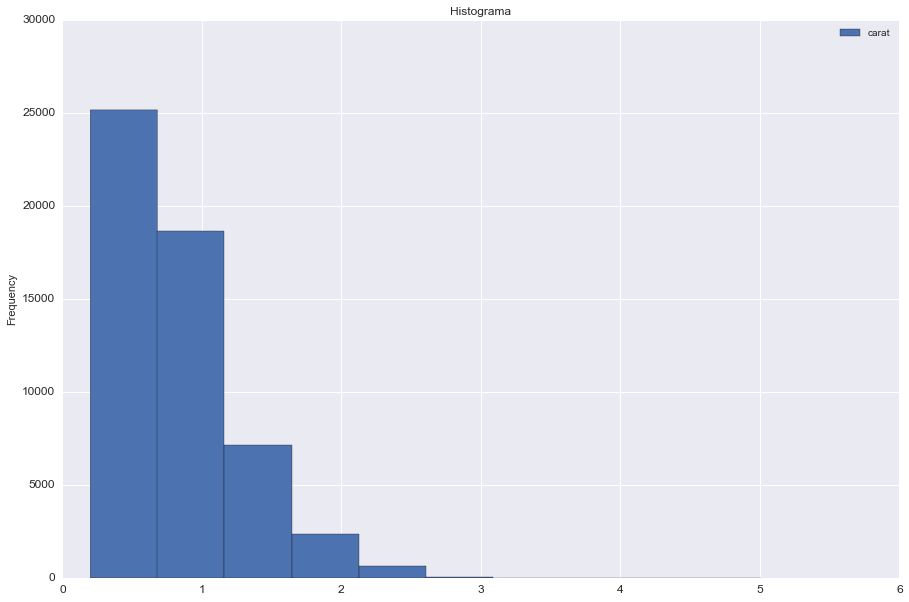

In [9]:
%matplotlib inline
ax = diamonds[['carat']].plot(kind="hist", title ="Histograma",figsize=(15,10),legend=True, fontsize=12)
plt.show()


In [10]:
# Desviacion típica de carat
DestipCarat = np.std(diamonds.carat)

#Distribución gamma 
Distgam = np.random.gamma (CaratMean, DestipCarat, len(diamonds['carat']))

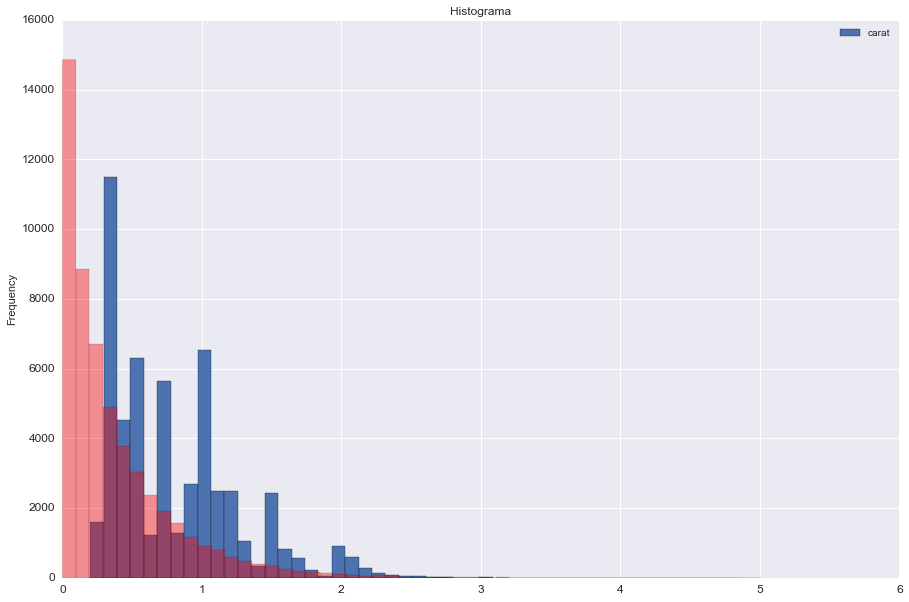

In [11]:
ax = diamonds['carat'].plot(kind="hist", title ="Histograma",bins=50,figsize=(15,10),legend=True, fontsize=12)
plt.hist(Distgam, bins=50, alpha=0.4, color='red')
plt.show()

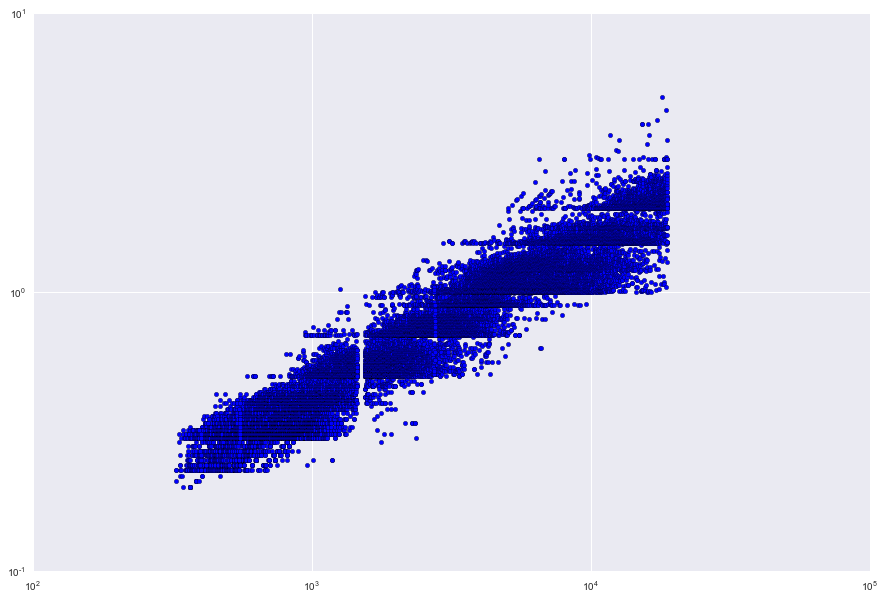

In [12]:
# Utilizando matplotlib, dibuja la nube de puntos de carat contra el precio, con ambos ejes en escala logarítmica.
#scatter(x, y, s, c, marker, cmap, norm, vmin, vmax, alpha, linewidths, verts, edgecolors, hold, data, **kwargs)

plt.figure(figsize=(15,10))
plt.scatter(diamonds['price'], diamonds['carat'])
plt.semilogx()
plt.semilogy()
plt.show()


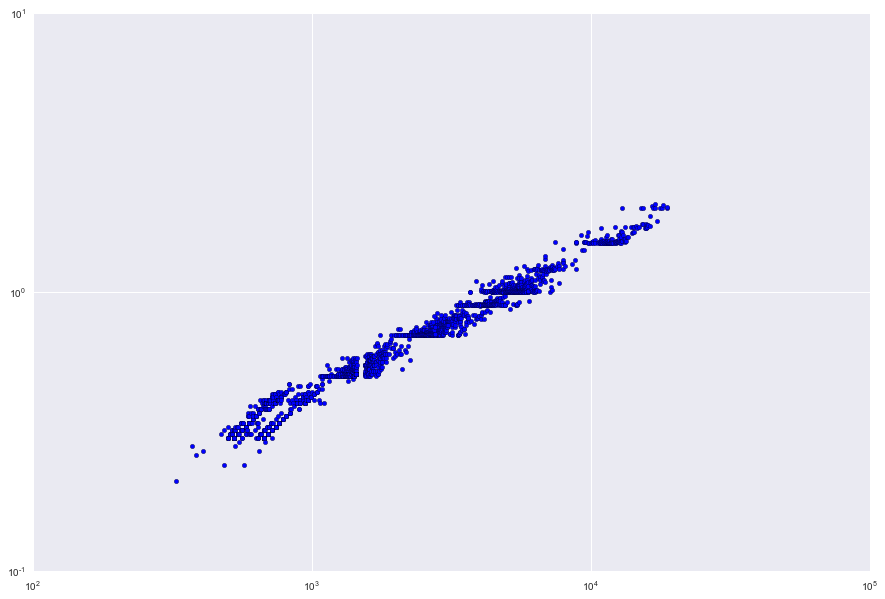

In [13]:
# Ahora repite el gráfico pero utiliza solo los datos cuyo color sea "E" y su claridad sea "SI1"

diamondsftd = diamonds[(diamonds.color=='E') & (diamonds.clarity=='SI1')]
plt.figure(figsize=(15,10))
plt.scatter(diamondsftd['price'], diamondsftd['carat'])
plt.semilogx()
plt.semilogy()
plt.show()


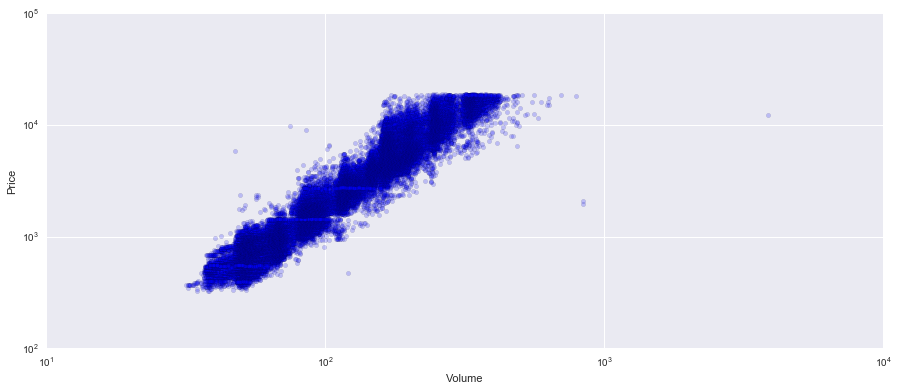

In [49]:
# Investiga con un gráfico la relación entre el volumen (que puedes aproximar a partir de x, y, z) y el precio,
# de nuevo en escala logarítmica.

diamonds['VolumenPrecio'] = diamonds['x']*diamonds['y']*diamonds['z']
diaNCero = diamonds[diamonds['VolumenPrecio']>0]


fig = plt.figure(1, figsize=(15, 6))
asp = fig.add_subplot(111)
asp.set_xlabel('Volume')
asp.set_ylabel('Price')
asp.set_yscale('log')
asp.set_xscale('log')

plt.scatter(diaNCero.VolumenPrecio, diaNCero.price, alpha=0.2)
#plt.loglog()
plt.grid(True)
plt.show()


In [15]:
# Utilizando scipy.stats, comprueba si se la relación anterior ajusta bien a un modelo de regresión lineal, 
# tomando solo los 1000 primeros valores del dataset

diamondsHD = diamonds.head(1000)
x = range(len(diamondsHD))
scale, intercept, r_value, p_value, std_err = stats.linregress(diamondsHD.VolumenPrecio, diamondsHD.price)
print 'P-Value  ---> ', p_value

P-Value  --->  8.1360097692e-301


In [16]:
# al ser cercao a cero, se ajusta a regresion lineal

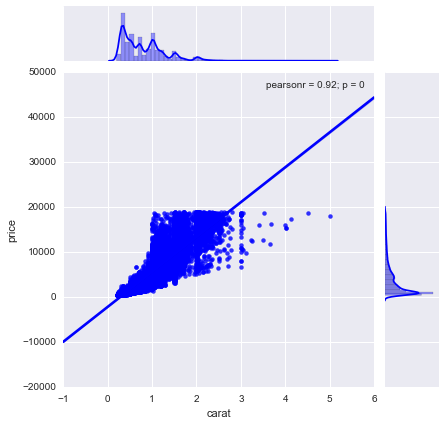

In [17]:
# Utilizando seaborn, representa la nube de puntos del precio contra el carat y asociando 
# al diagrama las distribuciones de las dos variables
sns.jointplot(x='carat', y='price', data=diamonds, kind="reg", color="blue")


In [18]:
# Identifica con un comando los diferentes tipos de corte (cut)
print (diamonds['cut'].unique())

['Ideal' 'Premium' 'Good' 'Very Good' 'Fair']


In [19]:
# Comprueba si hay diferencias significativas en la media del precio para los de corte
# "Ideal" y "Premium" y el resto, tomando 1000 valores de cada (nótese que no se puede
# asumir que las muestras son de una distribución normal). Puedes investigar funciones
# lógicas vectorizadas en NumPy como logical_or()

IdealPremium = diamonds[np.logical_or(diamonds['cut'] == 'Ideal', diamonds['cut'] == 'Premium')].head(1000)
print "Cortes ---> ", IdealPremium.cut.unique()
print "Media de IdealPremium ---> " , IdealPremium.price.mean()

Cortes --->  ['Ideal' 'Premium']
Media de IdealPremium --->  2573.572


In [20]:
RestoCortes = diamonds[np.logical_and(diamonds['cut'] != 'Ideal',diamonds['cut'] != 'Premium')].head(1000)
print "Cortes ---> ", RestoCortes.cut.unique()
print "Media Restocortes --->  " , RestoCortes.price.mean()

Cortes --->  ['Good' 'Very Good' 'Fair']
Media Restocortes --->   2692.669


In [21]:
# Obten la mediana del precio por cada valor de la claridad (clarity) y ordena los
# resultados de manera descendente

# Agrupando valores de Clarity.
diaClarity = diamonds.groupby('clarity')
print diaClarity.carat.count() 


clarity
I1        741
IF       1790
SI1     13065
SI2      9194
VS1      8171
VS2     12258
VVS1     3655
VVS2     5066
Name: carat, dtype: int64


In [22]:
# Calcula la mediana por precio.
MedianaClarity= pd.DataFrame(diaClarity.price.median())
print "Mediana Clarity \n"
print MedianaClarity


Mediana Clarity 

         price
clarity       
I1        3344
IF        1080
SI1       2822
SI2       4072
VS1       2005
VS2       2054
VVS1      1093
VVS2      1311


In [23]:
# Ordenando valores de forma descendente.
MedianaClaritySort = MedianaClarity.sort_values(['price'], ascending=0)
print "Mediana Clarity SORT \n"
print MedianaClaritySort

Mediana Clarity SORT 

         price
clarity       
SI2       4072
I1        3344
SI1       2822
VS2       2054
VS1       2005
VVS2      1311
VVS1      1093
IF        1080
